In [2]:
import pandas as pd 

In [3]:
import time

In [4]:
time.time()

1561957432.3836854

In [5]:
time.ctime()

'Mon Jul  1 10:34:03 2019'

In [6]:
time.ctime(891717742)

'Sun Apr  5 00:52:22 1998'

In [14]:
pd.Timestamp(891499660)

Timestamp('1970-01-01 00:00:00.891499660')

In [13]:
time.ctime(891499660)

'Thu Apr  2 12:17:40 1998'

In [22]:
data = pd.read_csv("ml-100k/u.data",sep="\t",names=["user","movie",
                                    "rating","timestamp"])

In [23]:
data.head()

,user,movie,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
data.drop("timestamp",axis=1,inplace=True)

In [28]:
data.head()

,user,movie,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [32]:
data.rename({'user':'uid','movie':'movie-id'},inplace=True,axis=1)

In [47]:
data.head()


,uid,movie-id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [48]:
data.columnsb

Index(['uid', 'movie-id', 'rating'], dtype='object')

In [52]:
data.rename({"movie-id":"mid"},inplace=True,axis=1)
data.columns

Index(['uid', 'mid', 'rating'], dtype='object')

In [43]:
item = pd.read_csv("ml-100k/u.item",sep='|',encoding='latin',             
names=['movie id',"movie title","release date",
        "video release date", "IMDb URL", "unknown","Action", 
       "Adventure","Animation", "Children's" ,"Comedy" ,"Crime",
       "Documentary","Drama", "Fantasy","Film-Noir",
       "Horror","Musical", "Mystery", "Romance", "Sci-Fi",
      "Thriller","War","Western" ] )

In [72]:
item.shape

(1682, 24)

In [73]:
item.columns

Index(['mid', 'movie title', 'release date', 'video release date', 'IMDb URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [74]:
item.head()

,mid,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
item.rename({"movie id":"mid"},axis=1,inplace=True)
item.columns

Index(['mid', 'movie title', 'release date', 'video release date', 'IMDb URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [76]:
movie = data.merge(item.iloc[:,:2],on="mid")

In [78]:
print("Columns = ",movie.columns)
print("Shape = ",movie.shape)

Columns =  Index(['uid', 'mid', 'rating', 'movie title'], dtype='object')
Shape =  (100003, 4)


In [79]:
movie.groupby("movie title")['rating'].count().sort_values(ascending=False)

movie title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)   

In [83]:
data = pd.read_csv("ml-100k/u.data",sep="\t",
usecols=range(3), names=['uid','mid','rating'])

In [84]:
data.head()

,uid,mid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [86]:
movie = pd.read_csv("ml-100k/u.item",sep="|",encoding='latin',
                   usecols=range(2),names=['mid','title'])

In [87]:
movie.head()

,mid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [88]:
df = pd.merge(data,movie,on='mid')

In [89]:
df.head()

,uid,mid,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [90]:
# pivot table 

info = df.pivot_table(index='uid',columns='title',
                     values='rating')

In [91]:
info.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
info.shape

(944, 1664)

In [98]:
star_wars = info['Star Wars (1977)']
star_wars.head()

uid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [99]:
star_wars.mean()

4.359589041095891

In [100]:
star_wars.min()

1.0

In [101]:
star_wars.max()

5.0

In [110]:
star_wars.head()

uid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [127]:
uid = list(star_wars.index)
rating = list(star_wars.values)

sw  = pd.DataFrame({ 'uid':uid,'rating':rating})

In [129]:
sw.groupby('rating').count()

,uid
rating,
1.0,9
2.0,16
3.0,57
4.0,176
5.0,326


In [147]:
star_wars.head()

uid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [150]:
sm_movie = info.corrwith(star_wars)

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [157]:
sm_movie.sort_values()[:20]

title
Frankie Starlight (1995)                 -1.0
Roseanna's Grave (For Roseanna) (1997)   -1.0
Two Deaths (1995)                        -1.0
I Like It Like That (1994)               -1.0
Theodore Rex (1995)                      -1.0
American Dream (1990)                    -1.0
Fille seule, La (A Single Girl) (1995)   -1.0
Swept from the Sea (1997)                -1.0
For Ever Mozart (1996)                   -1.0
Love and Death on Long Island (1997)     -1.0
Crossfire (1947)                         -1.0
Neon Bible, The (1995)                   -1.0
Salut cousin! (1996)                     -1.0
Sudden Manhattan (1996)                  -1.0
Fall (1997)                              -1.0
Nil By Mouth (1997)                      -1.0
Show, The (1995)                         -1.0
Sliding Doors (1998)                     -1.0
Tough and Deadly (1995)                  -1.0
Lover's Knot (1996)                      -1.0
dtype: float64

In [158]:
df.head()

,uid,mid,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [159]:
import numpy as np 

In [164]:
dd = df.groupby('title').agg({'title':np.size, 'rating':np.mean})
dd.head()

,title,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [182]:
dd.rename({'title':'size'},inplace=True,axis=1)
dd.head()

,size,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [168]:
popular_moives = dd[dd['title'] >= 100]

In [171]:
popular_moives.rename({'title':'size'},inplace=True,axis=1)
popular_moives.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,size,rating
title,,
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
2001: A Space Odyssey (1968),259,3.969112
Absolute Power (1997),127,3.370079
"Abyss, The (1989)",151,3.589404


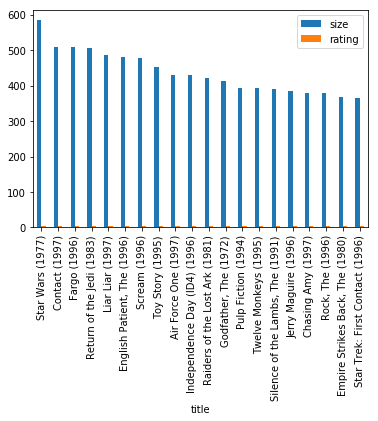

In [180]:
popular_moives.sort_values(['size','rating'],
    ascending=False)[:20].plot(kind='bar')
plt.show()

In [184]:
popular_moives

,size,rating
title,,
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
2001: A Space Odyssey (1968),259,3.969112
Absolute Power (1997),127,3.370079
"Abyss, The (1989)",151,3.589404
Ace Ventura: Pet Detective (1994),103,3.048544
"Adventures of Priscilla, Queen of the Desert, The (1994)",111,3.594595
"African Queen, The (1951)",152,4.184211
Air Force One (1997),431,3.631090


In [199]:
similar_movie = pd.DataFrame({
    'title' : sm_movie.index,
    'similarity' : sm_movie.values
})
similar_movie.head()# start wars

,title,similarity
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398


In [195]:
pop_moive = pd.DataFrame({
    'title': popular_moives.index,
    'size' : popular_moives['size'].values,
    'rating' : popular_moives['rating'].values
},index=range(popular_moives['size'].size))

pop_moive.head()

,title,size,rating
0,101 Dalmatians (1996),109,2.908257
1,12 Angry Men (1957),125,4.344000
2,2001: A Space Odyssey (1968),259,3.969112
3,Absolute Power (1997),127,3.370079
4,"Abyss, The (1989)",151,3.589404


In [202]:
similar_movie.head()

,title,similarity
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398


In [204]:
star = pd.merge(similar_movie,pop_moive,on='title')

In [209]:
star.sort_values(['similarity'],ascending=False)[:10]

,title,similarity,size,rating
295,Star Wars (1977),1.000000,584,4.359589
99,"Empire Strikes Back, The (1980)",0.748353,368,4.206522
255,Return of the Jedi (1983),0.672556,507,4.007890
247,Raiders of the Lost Ark (1981),0.536117,420,4.252381
24,Austin Powers: International Man of Mystery (1...,0.377433,130,3.246154
298,"Sting, The (1973)",0.367538,241,4.058091
162,Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
235,Pinocchio (1940),0.347868,101,3.673267
119,"Frighteners, The (1996)",0.332729,115,3.234783
176,L.A. Confidential (1997),0.319065,297,4.161616


In [210]:
similar_movie.sort_values('similarity',ascending=False)

,title,similarity
326,Commandments (1997),1.000000
343,Cosi (1996),1.000000
1072,No Escape (1994),1.000000
1418,Stripes (1981),1.000000
935,Man of the Year (1995),1.000000
688,Hollow Reed (1996),1.000000
137,"Beans of Egypt, Maine, The (1994)",1.000000
619,"Good Man in Africa, A (1994)",1.000000
1091,"Old Lady Who Walked in the Sea, The (Vieille q...",1.000000
1114,"Outlaw, The (1943)",1.000000
